## Importar librerias

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [3]:
compu = pd.read_csv('data/train.csv')

compu.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


## EDA

In [4]:
compu.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,977.0,1.001899e+07,6.306430e+06,1706374.8,5326308.0,8527428.0,13115700.0,54232308.0


In [5]:
compu.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 780.0 KB


In [6]:
compu.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

# Columnas

## Manufacturer

In [7]:
compu.Manufacturer.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

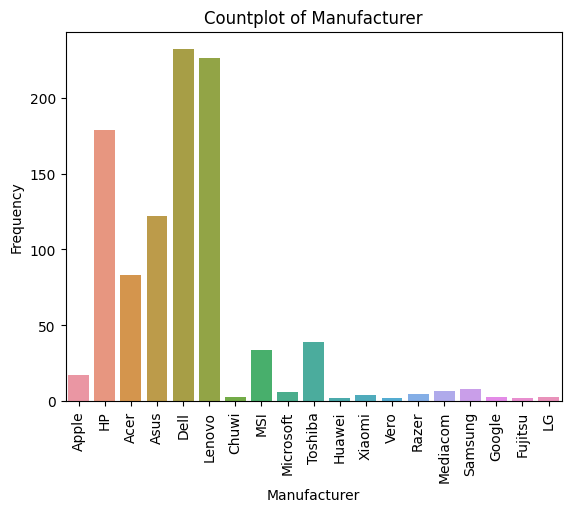

In [8]:
sns.countplot(data=compu, x='Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.title('Countplot of Manufacturer')
plt.xticks(rotation="vertical")
plt.show()

In [10]:
def replace_with_other(df, column, values):
    df[column] = df[column].apply(lambda x: x if x in values else 'Other')
    return df


manufacturer_list = ['HP', 'Asus', 'Dell', 'Toshiba', 'Lenovo', 'Acer', 'MSI', 'Vero', 'Apple', 'Razer', 'Samsung']
compu = replace_with_other(compu, 'Manufacturer', manufacturer_list)

## Model Name

Hay demasiados valores únicos por lo tanto no la voy a utilizar para entrenar al modelo

## Category

In [11]:
compu.Category.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

Ultrabook: Se refiere a un tipo de portátil ligero y delgado, con un enfoque en la portabilidad y la duración de la batería.

Notebook: Es una categoría general para referirse a portátiles o laptops en general, que ofrecen una combinación de rendimiento y portabilidad.

Netbook: Se refiere a un tipo de portátil pequeño y ligero, diseñado principalmente para tareas básicas y acceso a internet.

Gaming: Se refiere a ordenadores diseñados específicamente para juegos, con características y componentes de alto rendimiento para ofrecer una experiencia de juego óptima.

2 in 1 Convertible: Se refiere a portátiles o tablets que ofrecen la capacidad de convertirse entre diferentes modos, como portátil y tablet, generalmente mediante un mecanismo de bisagra o desmontaje.

Workstation: Se refiere a ordenadores de alto rendimiento diseñados para tareas exigentes y especializadas, como diseño gráfico, modelado 3D, renderizado, etc.

------------

Gaming y Workstation suelen ser más caros

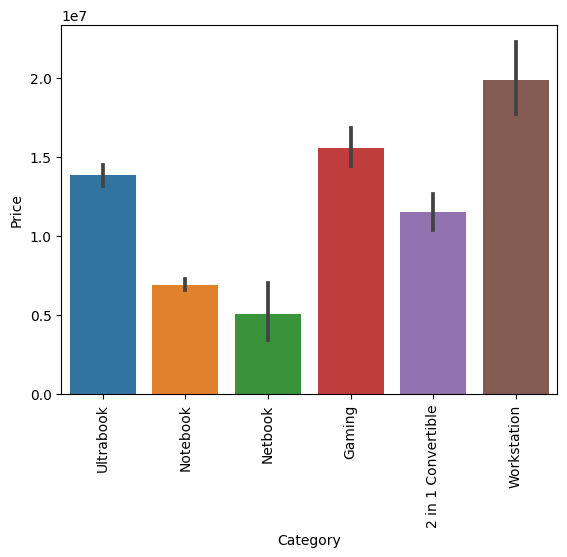

In [12]:

sns.barplot(x=compu['Category'], y=compu['Price'])
plt.xticks(rotation="vertical")
plt.show()

## Screen Size

In [13]:
compu['Screen Size'].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

Función para quitar las comillas de inches y transformar a númerico

In [14]:
def inches(s):
    s = str(s)  # Convertir a cadena de texto
    s = float(s.split('"')[0])
    return s

In [15]:
compu['Screen Size'] = compu['Screen Size'].apply(inches)

## CPU

In [17]:
compu.CPU.unique();

Función para clasificar el procesador

In [18]:

def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
  
  
compu['Processor'] = compu['CPU'].apply(lambda x: fetch_processor(x))

In [19]:
compu['Processor'].value_counts()

Intel Core i7            386
Intel Core i5            330
Other Intel Processor    108
Intel Core i3            105
AMD Processor             48
Name: Processor, dtype: int64

Como varía con el precio?

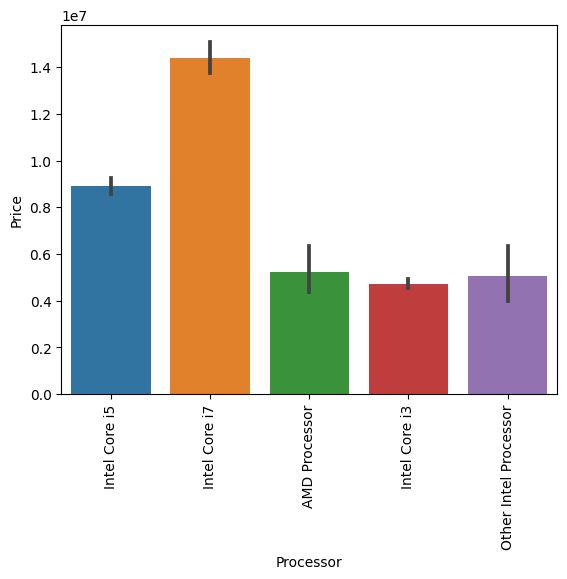

In [20]:
sns.barplot(x=compu['Processor'],y=compu['Price'])
plt.xticks(rotation='vertical')
plt.show()

## RAM

In [21]:
compu.RAM.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB'],
      dtype=object)

Función para quitar GB

In [22]:
def gb(s):
    s = str(s)  # Convertir a cadena de texto
    s = float(s.split('GB')[0])
    return s

In [23]:
compu.RAM = compu.RAM.apply(gb)

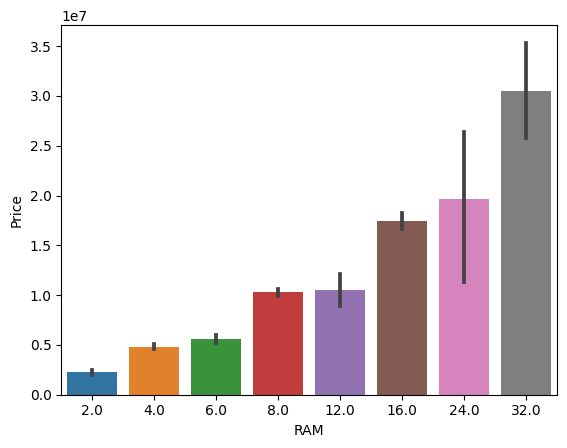

In [24]:
sns.barplot(x=compu['RAM'], y=compu['Price'])
plt.show()

## Storage

Clasifico según el tipo de memoria 

In [25]:
compu[' Storage'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '1GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid'], dtype=object)

In [26]:
def storage(d):
    if 'SSD' in d:
        s = 'SSD'
    elif 'HDD' in d:
        s = 'HDD'
    elif 'Flash Storage' in d:
        s = 'Flash Storage'
    elif 'Hybrid' in d:
        s = 'Hybrid'
    elif ('SSD' in d and 'HDD' in d):
        s = 'Hybrid'
    else:
        s = 'Other'
    return s


compu['Storage_class'] = compu[' Storage'].apply(lambda x: storage(x))


In [27]:
compu['Storage_class'].unique()

array(['SSD', 'Flash Storage', 'HDD', 'Hybrid'], dtype=object)

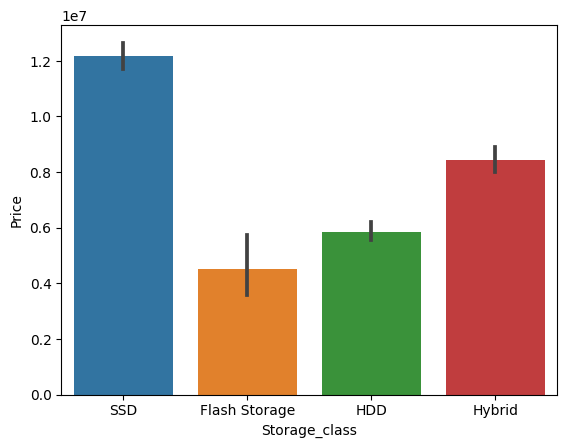

In [28]:
sns.barplot(x=compu['Storage_class'], y=compu['Price'])
plt.show()

## Weight

In [29]:
compu.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

Función para quitar los kg

In [30]:
def weight(s):
    s = str(s)  # Convertir a cadena de texto
    s = float(s.split('kg')[0])
    return s

In [31]:
compu.Weight = compu.Weight.apply(weight)

In [32]:
compu.Weight.unique

<bound method Series.unique of 0      1.37
1      1.34
2      1.86
3      1.83
4      1.37
       ... 
972    4.42
973    1.95
974    2.73
975    2.04
976    1.70
Name: Weight, Length: 977, dtype: float64>

In [33]:
def weight_class(s):
    if (s > 0.5 and s <= 1):
        s = 1
    elif s > 1 and s<= 1.5:
        s = 1.5
    elif s > 1.5 and s <=2:
        s = 2
    elif s > 2 and s <=2.5:
        s = 2.5
    elif s > 2.5 and s <=3:
        s = 3
    elif s > 3 and s <3.5:
        s = 3.5
    else:
        s=4
    return s
        

Para visualizar bien si el peso tiene importancia en el precio y parece que si

In [34]:
compu['Weight_class'] = compu.Weight.apply(weight_class)

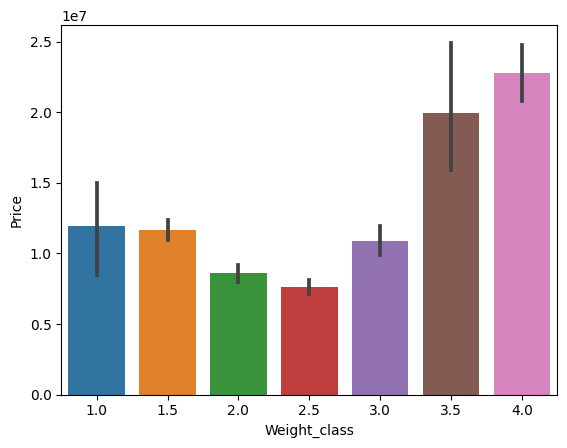

In [35]:
sns.barplot(x=compu['Weight_class'], y=compu['Price'])
plt.show()

## Operating System

In [36]:
compu['Operating System'].value_counts()

Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: Operating System, dtype: int64

In [37]:
def cat_os(text):
    if text=='Windows':
        return 'Windows'
    if text=='Linux':
        return 'Linux'
    
    elif text=='Mac OS' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    

compu['OS'] = compu['Operating System'].apply(cat_os)


In [38]:
compu.groupby('Operating System')['Price'].mean()

Operating System
Android      2.836548e+06
Chrome OS    5.255132e+06
Linux        5.665410e+06
Mac OS       1.200858e+07
No OS        5.313421e+06
Windows      1.059927e+07
macOS        1.555772e+07
Name: Price, dtype: float64

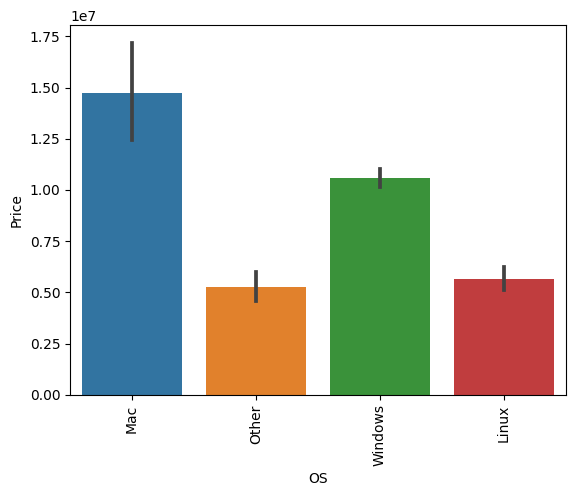

In [39]:
sns.barplot(x=compu['OS'],y=compu['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Operating System Version

Esta se va fuera

In [40]:
compu['Operating System Version'].value_counts()

10      819
7        10
10 S      8
X         4
Name: Operating System Version, dtype: int64

In [41]:
compu.groupby('Operating System Version')['Price'].count()

Operating System Version
10      819
10 S      8
7        10
X         4
Name: Price, dtype: int64

In [42]:
compu.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price', 'Processor',
       'Storage_class', 'Weight_class', 'OS'],
      dtype='object')

# GPU

In [43]:
compu.GPU;

Función para sacar la primera palabra me quedo con Intel, Nvidia y AMD

In [44]:
compu['Gpu_brand'] = compu['GPU'].apply(lambda x:x.split()[0])

compu['Gpu_brand'].value_counts()

Intel     525
Nvidia    310
AMD       142
Name: Gpu_brand, dtype: int64

## Screen

In [45]:
compu.Screen.unique();

Función para clasificar con la ayuda de ChatGPT

In [46]:
def classify_resolution(resolution):
    if '1366x768' in resolution or '1600x900' in resolution or '1920x1080' in resolution:
        return 'HD'
    elif '1440x900' in resolution or '2560x1440' in resolution:
        return 'QHD'
    elif '2880x1800' in resolution or '3200x1800' in resolution or '3840x2160' in resolution:
        return 'UHD'
    elif '2304x1440' in resolution or '2160x1440' in resolution or '2400x1600' in resolution:
        return 'Retina'
    elif '2736x1824' in resolution:
        return 'Retina'
    elif '1920x1200' in resolution:
        return 'Full HD+'
    elif '2256x1504' in resolution or '2560x1600' in resolution or 'Touchscreen' in resolution:
        return 'QHD'
    else:
        return 'Other'

compu['Screen_class'] = compu['Screen'].apply(classify_resolution)

In [47]:
compu['Screen_class'].unique()

array(['QHD', 'HD', 'UHD', 'Retina', 'Full HD+'], dtype=object)

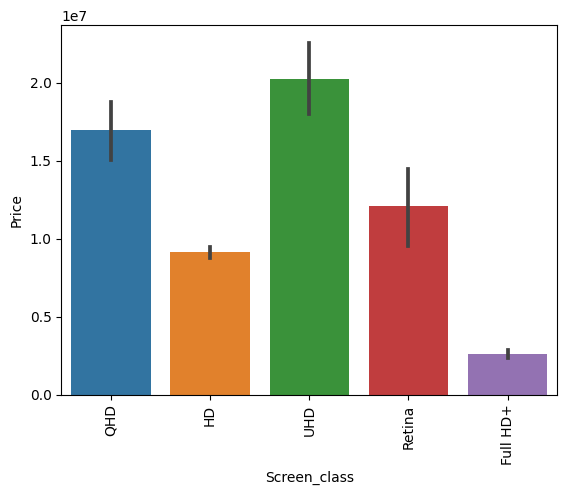

In [48]:
sns.barplot(x=compu['Screen_class'],y=compu['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
# Lista de columnas a eliminar
columns_to_drop = ['CPU', 'Operating System', 'Weight_class', 'Operating System Version', ' Storage', 'Screen', 'GPU', 'Model Name']

# Crear nuevo dataframe eliminando las columnas
new_compu = compu.drop(columns=columns_to_drop)


## Distribución de la columna objetivo

<AxesSubplot: xlabel='Price', ylabel='Density'>

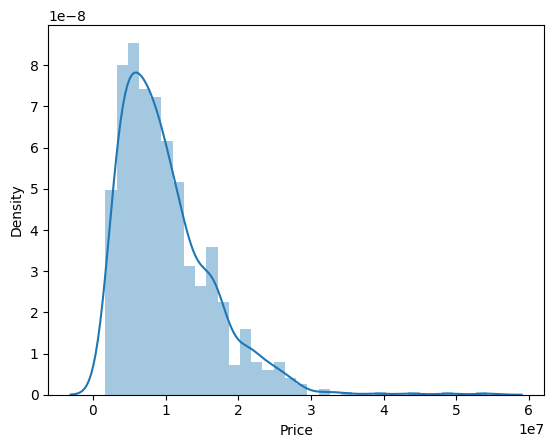

In [50]:
sns.distplot(new_compu['Price'])

In [51]:
new_compu.skew()

Screen Size   -0.397473
RAM            2.078221
Weight         1.184921
Price          1.627143
dtype: float64

Como la distribución de la columna es hacia la derecha la mejor opción para normalizar es aplicar una función logaritmica

In [52]:
new_compu['Price'] = np.log(new_compu['Price'])

<AxesSubplot: xlabel='Price', ylabel='Density'>

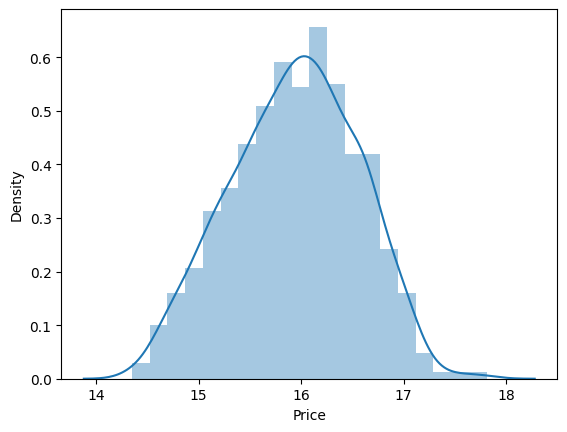

In [53]:
sns.distplot(new_compu['Price'])

# Modelo

Train test split

In [54]:
new_compu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Manufacturer   977 non-null    object 
 1   Category       977 non-null    object 
 2   Screen Size    977 non-null    float64
 3   RAM            977 non-null    float64
 4   Weight         977 non-null    float64
 5   Price          977 non-null    float64
 6   Processor      977 non-null    object 
 7   Storage_class  977 non-null    object 
 8   OS             977 non-null    object 
 9   Gpu_brand      977 non-null    object 
 10  Screen_class   977 non-null    object 
dtypes: float64(4), object(7)
memory usage: 84.1+ KB


Transformación con One Hot Encoder

In [55]:
data_encoded = pd.get_dummies(new_compu)

In [56]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Screen Size                      977 non-null    float64
 1   RAM                              977 non-null    float64
 2   Weight                           977 non-null    float64
 3   Price                            977 non-null    float64
 4   Manufacturer_Acer                977 non-null    uint8  
 5   Manufacturer_Apple               977 non-null    uint8  
 6   Manufacturer_Asus                977 non-null    uint8  
 7   Manufacturer_Dell                977 non-null    uint8  
 8   Manufacturer_HP                  977 non-null    uint8  
 9   Manufacturer_Lenovo              977 non-null    uint8  
 10  Manufacturer_MSI                 977 non-null    uint8  
 11  Manufacturer_Other               977 non-null    uint8  
 12  Manufacturer_Razer    

Train Test Split

In [57]:
X = data_encoded.drop(columns=['Price'])

y = data_encoded['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Con un Random Forest

In [58]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [59]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.04619828710269296
R2 Score: 0.8772014316640301


MSE: El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales. Cuanto más cercano a cero sea el valor del MSE, mejor será el rendimiento del modelo

R2 Score: El R2 Score proporciona una medida de cuánta varianza de la variable dependiente puede explicar el modelo. Un valor de 1 indica un ajuste perfecto, mientras que un valor de 0 indica que el modelo no puede explicar la varianza en absoluto.

### Ahora lo entreno con todos mis datos

In [60]:
modelo = RandomForestRegressor()
modelo.fit(X, y)

RandomForestRegressor()

# Le aplico a test todos mis cambios

In [61]:
test = pd.read_csv('data/test.csv')

test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              325 non-null    object
 1   Model Name                325 non-null    object
 2   Category                  325 non-null    object
 3   Screen Size               325 non-null    object
 4   Screen                    325 non-null    object
 5   CPU                       325 non-null    object
 6   RAM                       325 non-null    object
 7    Storage                  325 non-null    object
 8   GPU                       325 non-null    object
 9   Operating System          325 non-null    object
 10  Operating System Version  291 non-null    object
 11  Weight                    325 non-null    object
dtypes: object(12)
memory usage: 30.6+ KB


In [63]:
test = replace_with_other(test, 'Manufacturer', manufacturer_list)

test['Screen Size'] = test['Screen Size'].apply(inches)

test.Weight = test.Weight.apply(weight)

test.RAM = test.RAM.apply(gb)

test['Processor'] = test['CPU'].apply(lambda x: fetch_processor(x))

test['Storage_class'] = test[' Storage'].apply(lambda x: storage(x))

test['OS'] = test['Operating System'].apply(cat_os)

test['Gpu_brand'] = test['GPU'].apply(lambda x:x.split()[0])

test['Screen_class'] = test['Screen'].apply(classify_resolution)

test['Gpu_brand'] = test['Gpu_brand'].replace('ARM', 'AMD')

# Lista de columnas a eliminar
columns_to_drop = ['CPU', 'Operating System', 'Operating System Version', ' Storage', 'Screen', 'GPU', 'Model Name']

# Crear nuevo dataframe eliminando las columnas
new_test = test.drop(columns=columns_to_drop)

new_test.head()

,Manufacturer,Category,Screen Size,RAM,Weight,Processor,Storage_class,OS,Gpu_brand,Screen_class
0,HP,Notebook,15.6,6.0,2.04,Intel Core i7,HDD,Windows,Intel,HD
1,Asus,Gaming,17.3,16.0,2.99,Intel Core i7,SSD,Windows,Nvidia,HD
2,Dell,2 in 1 Convertible,15.6,12.0,2.19,Intel Core i7,SSD,Windows,Intel,HD
3,Toshiba,Notebook,13.3,4.0,1.20,Intel Core i5,SSD,Windows,Intel,HD
4,Lenovo,Notebook,15.6,6.0,2.20,AMD Processor,SSD,Windows,AMD,HD


Transformación con One Hot Encoder

In [64]:

test_encoded = pd.get_dummies(new_test)

test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Screen Size                      325 non-null    float64
 1   RAM                              325 non-null    float64
 2   Weight                           325 non-null    float64
 3   Manufacturer_Acer                325 non-null    uint8  
 4   Manufacturer_Apple               325 non-null    uint8  
 5   Manufacturer_Asus                325 non-null    uint8  
 6   Manufacturer_Dell                325 non-null    uint8  
 7   Manufacturer_HP                  325 non-null    uint8  
 8   Manufacturer_Lenovo              325 non-null    uint8  
 9   Manufacturer_MSI                 325 non-null    uint8  
 10  Manufacturer_Other               325 non-null    uint8  
 11  Manufacturer_Razer               325 non-null    uint8  
 12  Manufacturer_Samsung  

In [65]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Screen Size                      977 non-null    float64
 1   RAM                              977 non-null    float64
 2   Weight                           977 non-null    float64
 3   Price                            977 non-null    float64
 4   Manufacturer_Acer                977 non-null    uint8  
 5   Manufacturer_Apple               977 non-null    uint8  
 6   Manufacturer_Asus                977 non-null    uint8  
 7   Manufacturer_Dell                977 non-null    uint8  
 8   Manufacturer_HP                  977 non-null    uint8  
 9   Manufacturer_Lenovo              977 non-null    uint8  
 10  Manufacturer_MSI                 977 non-null    uint8  
 11  Manufacturer_Other               977 non-null    uint8  
 12  Manufacturer_Razer    

In [66]:

y_pred_test = model.predict(test_encoded)

In [67]:
# Transformación inversa a las predicciones del conjunto de pruebas ya que la he transformado antes a escala logaritmica
y_pred_test_transformed = np.exp(y_pred_test)

# Obtener los valores reales de los precios del conjunto de pruebas en forma de arraayy
y_pred_test_actual = y_pred_test_transformed.flatten()  

In [68]:
test['Price_Pred'] = y_pred_test_actual

In [69]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Screen Size,325.0,1.490892e+01,1.446840e+00,1.010000e+01,1.400000e+01,1.560000e+01,1.560000e+01,1.730000e+01
RAM,325.0,7.920000e+00,5.310693e+00,2.000000e+00,4.000000e+00,8.000000e+00,8.000000e+00,6.400000e+01
Weight,325.0,2.036745e+00,6.657553e-01,6.900000e-01,1.500000e+00,2.090000e+00,2.310000e+00,4.600000e+00
Price_Pred,325.0,9.338867e+06,5.122692e+06,2.409466e+06,5.367796e+06,8.700641e+06,1.241021e+07,2.884533e+07


In [70]:
compu.describe().T

,count,mean,std,min,25%,50%,75%,max
Screen Size,977.0,1.505261e+01,1.418950e+00,10.10,14.0,15.60,15.6,18.4
RAM,977.0,8.528147e+00,4.997487e+00,2.00,4.0,8.00,8.0,32.0
Weight,977.0,2.039128e+00,6.660094e-01,0.69,1.5,2.02,2.3,4.7
Price,977.0,1.001899e+07,6.306430e+06,1706374.80,5326308.0,8527428.00,13115700.0,54232308.0
Weight_class,977.0,2.245138e+00,6.235963e-01,1.00,1.5,2.50,2.5,4.0


In [71]:
pred_df = pd.DataFrame(y_pred_test_actual, columns=["Price"])
pred_df["id"] = test_encoded.index
pred_df = pred_df.set_index("id")

# exportar predicciones :)
#pred_df.to_csv("predict2.csv")